In [1]:
import scqubits as scq
import numpy as np
from scqubits import ParameterSweep

In [2]:


tmon1 = scq.TunableTransmon(
    EJmax=40.0,
    EC=0.2,
    d=0.1,
    flux=0.23,
    ng=0.3,
    ncut=40,
    truncated_dim=3,     # after diagonalization, we will keep 3 levels
    id_str="tmon1"       # optional, used for referencing from within
                         # ParameterSweep or HilbertSpace
)

tmon2 = scq.TunableTransmon(
    EJmax=15.0,
    EC=0.15,
    d=0.2,
    flux=0.0,
    ng=0.0,
    ncut=30,
    truncated_dim=3,
    id_str="tmon2"
)

resonator = scq.Oscillator(
    E_osc=4.5,
    truncated_dim=4    # up to 3 photons (0,1,2,3)
)

hilbertspace = scq.HilbertSpace([tmon1, tmon2, resonator])


g1 = 0.1  # coupling resonator-CPB1 (without charge matrix elements)
g2 = 0.2  # coupling resonator-CPB2 (without charge matrix elements)

hilbertspace.add_interaction(
    g_strength = g1,
    op1 = tmon1.n_operator,
    op2 = resonator.creation_operator,
    add_hc = True,
    id_str="tmon1-resonator"  # optional keyword argument
)

hilbertspace.add_interaction(
    g_strength = g2,
    op1 = tmon2.n_operator,
    op2 = resonator.creation_operator,
    add_hc = True,
    id_str="tmon2-resonator"  # optional keyword argument
)

pname1 = 'flux'
flux_vals = np.linspace(0.0, 2.0, 171)
pname2 = 'ng'
ng_vals = np.linspace(-0.5, 0.5, 49)

# combine into a dictionary
paramvals_by_name = {pname1: flux_vals, pname2: ng_vals}


area_ratio = 1.2

def update_hilbertspace(flux, ng):  # function that defines how Hilbert space components are updated
    tmon1.flux = flux
    tmon2.flux = area_ratio * flux
    tmon2.ng = ng

# dictionary with information on which subsystems are affected by changing parameters
subsys_update_info = {pname1: [tmon1, tmon2],
                      pname2: [tmon2]}


# create the ParameterSweep
sweep = ParameterSweep(
    hilbertspace=hilbertspace,
    paramvals_by_name=paramvals_by_name,
    update_hilbertspace=update_hilbertspace,
    evals_count=20,
    subsys_update_info=subsys_update_info,
    num_cpus=5
)



Parallel compute bare eigensys for subsystem tmon1 [num_cpus=5]

Parallel compute bare eigensys for subsystem tmon2 [num_cpus=5]

Parallel compute bare eigensys for subsystem Oscillator_1 [num_cpus=5]

Parallel compute dressed eigensys [num_cpus=5]

energy_by_bare_index: bare_tuple=(0.0, 0.0, 0.0), subtract_ground=False, param_npindices=None
energy_by_bare_index: bare_tuple=(1.0, 0.0, 0.0), subtract_ground=False, param_npindices=None
energy_by_bare_index: bare_tuple=(2.0, 0.0, 0.0), subtract_ground=False, param_npindices=None
energy_by_bare_index: bare_tuple=(0.0, 0.0, 0.0), subtract_ground=False, param_npindices=None
energy_by_bare_index: bare_tuple=(0.0, 1.0, 0.0), subtract_ground=False, param_npindices=None
energy_by_bare_index: bare_tuple=(0.0, 2.0, 0.0), subtract_ground=False, param_npindices=None
energy_by_bare_index: bare_tuple=(0.0, 0.0, 0.0), subtract_ground=False, param_npindices=None
energy_by_bare_index: bare_tuple=(0.0, 0.0, 1.0), subtract_ground=False, param_npindices=None
energy_by_bare_index: bare_tuple=(0.0, 0.0, 2.0), subtract_ground=False, param_npindices=None
energy_by_bare_index: bare_tuple=(0.0, 0.0, 3.0), subtract_ground=False, param_npindices=None
energy_by_bare_index: bare_tuple=(0.0, 0.0, 0.0), subtract_g

None
[None] [None]
None [TunableTransmon(**{'EJmax': 40.0, 'EC': 0.2, 'd': 0.1, 'flux': 0.0, 'ng': 0.3, 'ncut': 40, 'truncated_dim': 3, 'id_str': 'tmon1', 'evals_method': None, 'evals_method_options': None, 'esys_method': None, 'esys_method_options': None}), TunableTransmon(**{'EJmax': 15.0, 'EC': 0.15, 'd': 0.2, 'flux': 0.0, 'ng': -0.5, 'ncut': 30, 'truncated_dim': 3, 'id_str': 'tmon2', 'evals_method': None, 'evals_method_options': None, 'esys_method': None, 'esys_method_options': None}), Oscillator(**{'E_osc': 4.5, 'l_osc': None, 'truncated_dim': 4, 'id_str': 'Oscillator_1'})]
None [TunableTransmon(**{'EJmax': 40.0, 'EC': 0.2, 'd': 0.1, 'flux': 0.0, 'ng': 0.3, 'ncut': 40, 'truncated_dim': 3, 'id_str': 'tmon1', 'evals_method': None, 'evals_method_options': None, 'esys_method': None, 'esys_method_options': None}), TunableTransmon(**{'EJmax': 15.0, 'EC': 0.15, 'd': 0.2, 'flux': 0.0, 'ng': -0.5, 'ncut': 30, 'truncated_dim': 3, 'id_str': 'tmon2', 'evals_method': None, 'evals_method_option

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\Phi_{ext}/\\Phi_0$', ylabel='energy [GHz]'>)

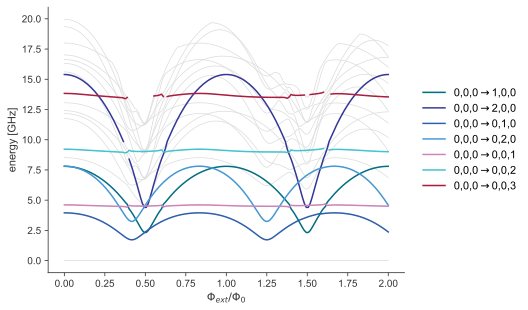

In [3]:
sweep["ng":0.0].plot_transitions()

In [4]:
sweep["ng":0.0].plot_transitions(initial=[(1,2,4), (1,3,1)], final=[(0,1,0)])


[(1, 2, 4), (1, 3, 1)]
[(1, 2, 4), (1, 3, 1)] [(0, 1, 0)]
(1, 2, 4) [TunableTransmon(**{'EJmax': 40.0, 'EC': 0.2, 'd': 0.1, 'flux': 0.0, 'ng': 0.3, 'ncut': 40, 'truncated_dim': 3, 'id_str': 'tmon1', 'evals_method': None, 'evals_method_options': None, 'esys_method': None, 'esys_method_options': None}), TunableTransmon(**{'EJmax': 15.0, 'EC': 0.15, 'd': 0.2, 'flux': 0.0, 'ng': -0.5, 'ncut': 30, 'truncated_dim': 3, 'id_str': 'tmon2', 'evals_method': None, 'evals_method_options': None, 'esys_method': None, 'esys_method_options': None}), Oscillator(**{'E_osc': 4.5, 'l_osc': None, 'truncated_dim': 4, 'id_str': 'Oscillator_1'})]
(1, 2, 4) [TunableTransmon(**{'EJmax': 40.0, 'EC': 0.2, 'd': 0.1, 'flux': 0.0, 'ng': 0.3, 'ncut': 40, 'truncated_dim': 3, 'id_str': 'tmon1', 'evals_method': None, 'evals_method_options': None, 'esys_method': None, 'esys_method_options': None}), TunableTransmon(**{'EJmax': 15.0, 'EC': 0.15, 'd': 0.2, 'flux': 0.0, 'ng': -0.5, 'ncut': 30, 'truncated_dim': 3, 'id_str': 't

AttributeError: 'float' object has no attribute 'toarray'

(0, 0, 0)
[-48.9776994  -48.93884687 -48.82236    -48.62845096 -48.35747333
 -48.00992208 -47.58643355 -47.08778551 -46.51489723 -45.86882976
 -45.15078635 -44.36211321 -43.50430062 -42.57898464 -41.58794954
 -40.53313131 -39.41662245 -38.24067872 -37.00772835 -35.72038475
 -34.38146389 -32.99400835 -31.56132055 -30.08700918 -28.57505463
 -27.02990197 -25.45659479 -23.86096954 -22.24993985 -20.63191187
 -19.01738143 -17.41974894 -15.85628984 -14.34890156 -12.92358598
 -11.60707008 -10.42044774  -9.37435049  -8.47207987  -7.72104905
  -7.14807532  -6.81575706  -6.82847896  -7.28485451  -8.17750122
  -9.39233258 -10.8074147  -12.33949349 -13.93819962 -15.57272721
 -17.22315121 -18.87570623 -20.52026755 -22.14897039 -23.75542237
 -25.33423582 -26.88073931 -28.39079378 -29.86067174 -31.28697607
 -32.66658425 -33.99660928 -35.2743721  -36.49738181 -37.66332137
 -38.77003729 -39.81553212 -40.79795908 -41.71561812 -42.56695322
 -43.35055043 -44.06513667 -44.70957886 -45.2828835  -45.78419648


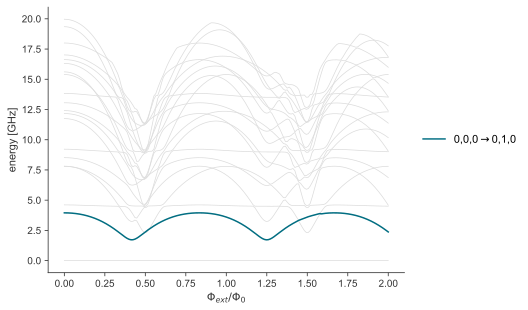

In [5]:
sweep["ng":0.0].plot_transitions(final=(0,1,0));


In [6]:
sweep["ng":0.0].plot_transitions(initial=[(1,2,4), (1,3,1)], final=[(0,1,0)])


(1, 2, 4)
nan
(slice(None, None, None), 24)


AttributeError: 'float' object has no attribute 'toarray'

In [ ]:
sweep.plot_transitions(initial=[(1,2,4), (1,3,1)], final=[(0,1,0)])


AttributeError: 'float' object has no attribute 'toarray'